### 의사결정나무(DT)
- IF-ELSE 방식의 질문에 대한 답변으로 문제를 해결하는 알고리즘
- 피쳐(특성) 중에서 선택한 기준으로 데이터 분할
    * 엔트로피 (불순정도) => 낮아지는 방향
    * 정보이득 : 1 - 엔트로피 => 높아지는 방향
    * 지니계수 : 불평등수치값 => 낮아지는 방향
- 단점 : 과대적합이 될 가능성 높음 ! 성능이 좋지 않음
- 장점 : 전처리 영향을 받지 않음 / 직관성이 높음
- 주의
    * 여기서의 주요 피쳐는 데이터 분할을 위한 주요 피쳐
    * 100% 데이터의 주요 피쳐가 아닐 수도 있음 => 다른 검사(상관계수, 시각화 등등)와 함께 평가

[1] 모듈 로딩 및 데이터 준비 <hr>

In [14]:
import pandas as pd
import numpy as  np
from sklearn.model_selection import train_test_split

In [15]:
irisDF = pd.read_csv('../data/iris.csv')
irisDF.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


[2] 학습용 데이터셋 준비 <hr>

[2-1] 피쳐와 타겟 분리

In [16]:
featureDF = irisDF[irisDF.columns[:-1]]
targetSR = irisDF[irisDF.columns[-1]]

[2-2] 훈련용과 테스트용 데이터셋 분리

In [17]:
xtrain, xtest, ytrain, ytest = train_test_split(featureDF,targetSR,
                                                test_size=0.2,
                                                stratify=targetSR,
                                                random_state=7)
xtrain.shape, xtest.shape

((120, 4), (30, 4))

[3] 기계학습 진행 <hr>
- 타겟 데이터 확인 결과 : 3개의 분류 - 다중분류
- 학습 유형 : 지도학습 + 분류
    * 분류 알고리즘 => KNN, LogisticRegression, SVM-SVC, DecisionTree

In [18]:
from sklearn.tree import DecisionTreeClassifier

In [19]:
# 인스턴스 생성 및 학습
model = DecisionTreeClassifier( criterion='entropy')  # criterion='entropy' -> 엔트로피 낮은 순서대로
model.fit(xtrain,ytrain)

DecisionTreeClassifier(criterion='entropy')

In [20]:
# 생성된 모델 구조 시각화
from sklearn.tree import export_graphviz
# dot 언어로 작성된 내용을 시각화 해주는 모듈
import graphviz as gz

In [21]:
# DT 모델의 시각화 정보를 dot 언어로 작성해서 파일로 저장
export_graphviz(model, out_file='iris_dt_model.txt', filled=True, rounded=True )

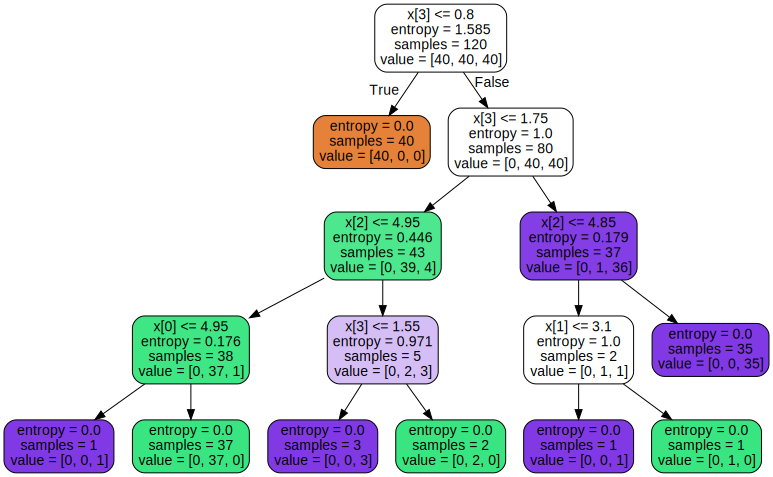

In [22]:
# 기본값 : 지니계수가 높은 값으로
gz.Source.from_file('iris_dt_model.txt')

[4] 모델 평가 <hr>

In [24]:
model.score(xtrain,ytrain), model.score(xtest,ytest)  # 과대적합

(1.0, 0.9333333333333333)

[5] 문제 해결 및 성능 향상 즉, 튜닝 <hr>
- 원인 예상
    * 데이터셋 부족 => cv(교차검증)
    * DT의 여러가지 하이퍼파라미터 기본값으로만 사용 => 다양한 값 조절
- 해결 방법
    * 2개의 원인을 한꺼번에 해결하기 위해서 GridSearchCV

In [26]:
# 모듈 로딩
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [38]:
# 모델 조합 조건
# cv => 기본 5, ..
# DT의 하이퍼 파라미터 => max_depth, ..
dt_model = DecisionTreeClassifier()
n_cv = 5
parm = {'criterion':['gini','entropy','log_loss'],
        'max_depth': [5,10,15],
        'min_samples_split':[2,4,6]    
}
# 하이퍼 파라미터 조합된 모델 생성 후 교차검증 데이터셋으로 학습진행해주는 인스턴스
gs = GridSearchCV(model,param_grid=parm,cv = n_cv, return_train_score=True)

# 조합된 모델들의 학습 진행
result = gs.fit(xtrain,ytrain)

In [40]:
# 결과 확인
result

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(criterion='entropy'),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [5, 10, 15],
                         'min_samples_split': [2, 4, 6]},
             return_train_score=True)

In [48]:
# 학습 후 저장된 모델 파라미터 확인
# 교차학습 결과 => 조합된 모델의 갯수 만큼
pd.DataFrame(gs.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_split,params,split0_test_score,split1_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.001238,0.000471,0.001046,0.000047,gini,5,2,"{'criterion': 'gini', 'max_depth': 5, 'min_sam...",1.0,0.958333,...,0.941667,0.042492,8,1.000000,1.000000,1.000000,0.989583,1.000000,0.997917,0.004167
1,0.001445,0.000515,0.000873,0.000438,gini,5,4,"{'criterion': 'gini', 'max_depth': 5, 'min_sam...",1.0,0.958333,...,0.941667,0.042492,8,0.989583,0.989583,1.000000,0.989583,0.989583,0.991667,0.004167
2,0.001068,0.000033,0.000826,0.000756,gini,5,6,"{'criterion': 'gini', 'max_depth': 5, 'min_sam...",1.0,0.958333,...,0.933333,0.042492,19,0.968750,0.968750,0.989583,0.989583,0.989583,0.981250,0.010206
3,0.001100,0.000028,0.000657,0.000537,gini,10,2,"{'criterion': 'gini', 'max_depth': 10, 'min_sa...",1.0,0.958333,...,0.941667,0.042492,8,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
4,0.001099,0.000010,0.000661,0.000540,gini,10,4,"{'criterion': 'gini', 'max_depth': 10, 'min_sa...",1.0,0.958333,...,0.941667,0.042492,8,0.989583,0.989583,1.000000,0.989583,0.989583,0.991667,0.004167
5,0.001324,0.000439,0.000896,0.000418,gini,10,6,"{'criterion': 'gini', 'max_depth': 10, 'min_sa...",1.0,0.958333,...,0.933333,0.042492,19,0.968750,0.968750,0.989583,0.989583,0.989583,0.981250,0.010206
6,0.001111,0.000005,0.000666,0.000544,gini,15,2,"{'criterion': 'gini', 'max_depth': 15, 'min_sa...",1.0,0.958333,...,0.950000,0.040825,1,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
7,0.001106,0.000004,0.000884,0.000442,gini,15,4,"{'criterion': 'gini', 'max_depth': 15, 'min_sa...",1.0,0.958333,...,0.941667,0.042492,8,0.989583,0.989583,1.000000,0.989583,0.989583,0.991667,0.004167
8,0.001111,0.000013,0.001152,0.000053,gini,15,6,"{'criterion': 'gini', 'max_depth': 15, 'min_sa...",1.0,0.958333,...,0.933333,0.042492,19,0.968750,0.968750,0.989583,0.989583,0.989583,0.981250,0.010206
9,0.001108,0.000029,0.000651,0.000532,entropy,5,2,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",1.0,0.958333,...,0.950000,0.040825,1,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000


In [50]:
# 조합된 모델 중 최고의 성능을 내는 하이퍼파라미터 값
gs.best_params_

{'criterion': 'gini', 'max_depth': 15, 'min_samples_split': 2}

In [60]:
# 조합된 모델 중 최고의 성능을 내는 모델 인스턴스
# 모델을 따로 저장해놔야 함
my_best_model = gs.best_estimator_  # 이미 학습되어있는 모델 인스턴스 -> 새로 학습시킬 필요 없음

In [57]:
# 조합된 모델 중 최고의 점수
gs.best_score_  # test score

0.95

[6] 학습 및 튜닝 후 모델 저장 <hr>
- 다른 파일에서 활용이 가능한 파일 형태로 저장
- 웹 / 앱 원하는 곳에서 활용 가능
- scikit-learn에서는 pickle 포맷으로 저장
- joblib 모듈에 해당 기능 포함되어 있음

In [62]:
import joblib
import os

In [72]:
# 모델 저장
model_dir = '../model/'
model_filename = model_dir + 'iris_dt.pkl'

# 저장 폴더 존재 여부 확인 후 저장
if not os.path.exists(model_dir):
        os.makedirs(model_dir)
        
joblib.dump(my_best_model,model_filename)

['../model/iris_dt.pkl']